<a href="https://colab.research.google.com/github/lauracarbaugh/eda_assignment/blob/main/eda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Question 1
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
print(os.path.exists("/content/drive/My Drive/EDAHWPart1.pdf"))



Mounted at /content/drive
True


In [77]:
from IPython.display import IFrame
FILE_ID = "EDAHWPart1.pdf"
IFrame(src=f"https://drive.google.com/file/d/1mOtwrNtSNdCkr_A9aEUtcKbYQfnsbEgV/view?usp=sharing", width=800, height=600)
# answers found at the link



In [78]:
! git clone https://github.com/lauracarbaugh/eda_assignment.git

fatal: destination path 'eda_assignment' already exists and is not an empty directory.


In [79]:
!git config --global user.name "lauracarbaugh"
!git config --global user.email "rnr7tu@virginia.edu"

In [80]:
# Question 2
import pandas as pd
import numpy as np
import seaborn as sns
airbnb = pd.read_csv("airbnb_hw.csv")
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [81]:
print(airbnb.shape)
print(airbnb.dtypes)


(30478, 13)
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


Question 2.2: The dimensions of the data set is 30478 observations across 13 columns. There are 30478 observations. The variables included are: Host ID, Host Since, Name, Neighbourhood, Property type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating.

In [82]:
# Question 2.3
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Question 2.3: Entire homes/apts are the most preferred property type, and private rooms are more frequent in shared living spaces such as a townhouse or a bed and breakfast. It is more common to rent a private room than the entire property for a Bed & Breakfast, Castle, Chalet, Dorm, House, Hut, Tent, and Treehouse.

<Axes: xlabel='clean_price', ylabel='Count'>

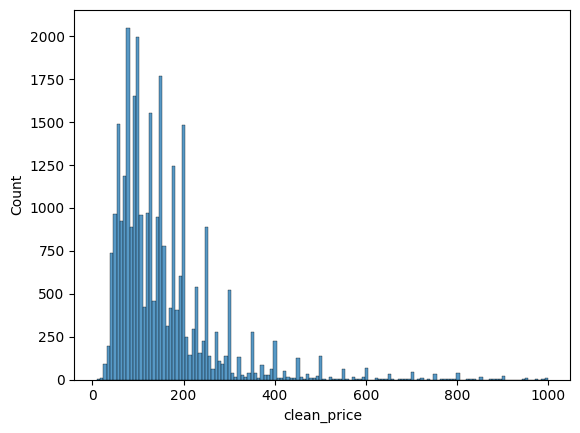

In [83]:
# Question 2.4
# Histogram
airbnb['clean_price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
sns.histplot(airbnb['clean_price'])

<Axes: xlabel='clean_price', ylabel='Density'>

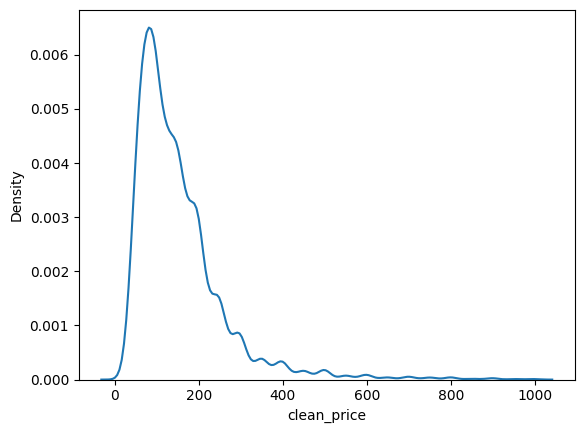

In [84]:
# Kernel density
sns.kdeplot(airbnb['clean_price'])

<Axes: ylabel='clean_price'>

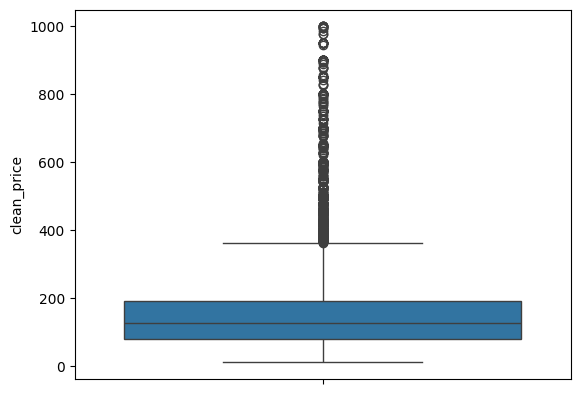

In [85]:
# Boxplot
sns.boxplot(airbnb['clean_price'])

In [86]:
# Summary
airbnb['clean_price'].describe()

,clean_price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


Question 2.4 Part A: The data are not badly scaled, but they are heavily skewed as the mean (153) is much larger than the median (125). Using the IQR rule, any price above 360 is flagged as an outlier, and since prices go up to 999, there are many outliers.

<Axes: xlabel='price_log', ylabel='Count'>

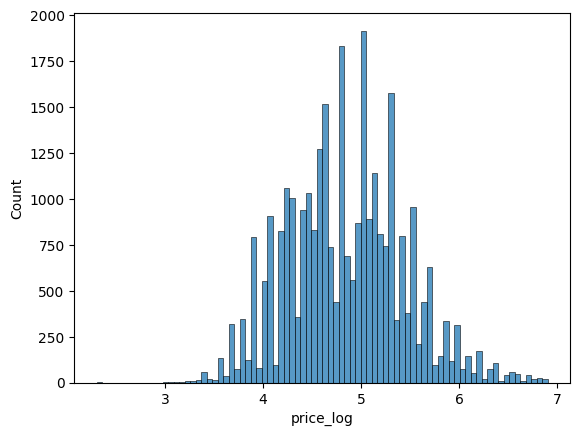

In [87]:
# Log histogram
airbnb['price_log'] = np.log(airbnb['clean_price'])
sns.histplot(airbnb['price_log'])

<Axes: xlabel='price_log', ylabel='Density'>

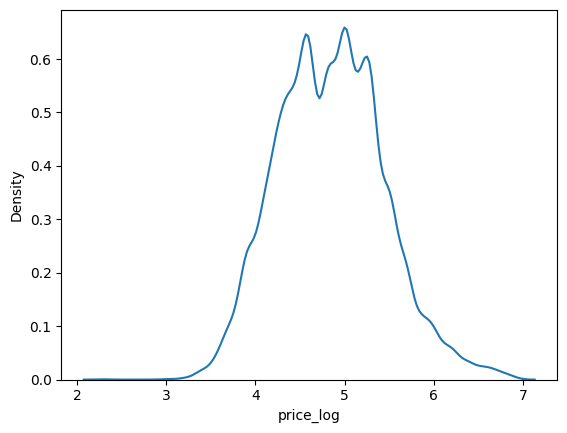

In [88]:
# Log density plot
sns.kdeplot(airbnb['price_log'])

<Axes: ylabel='price_log'>

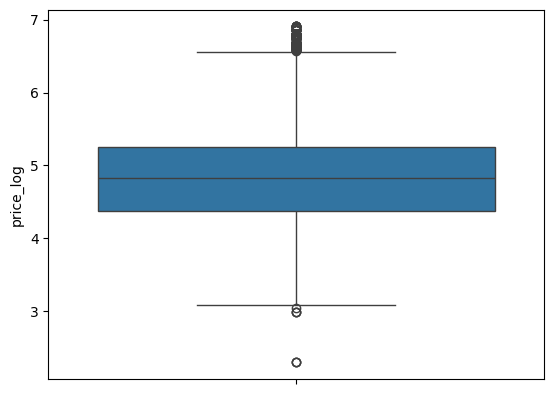

In [90]:
# Log boxplot
sns.boxplot(airbnb['price_log'])

In [91]:
# Log describe
airbnb['price_log'].describe()

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


Question 2.4 Part B: The histogram and kernel density plot look much more symmetric and the median and mean values are very close which indicated reduced skew. Using the IQR rule, outliers occur in raw prices under $22 and over $725, so while there are still outliers present, the log transformation greatly reduced them.

<Axes: xlabel='price_log', ylabel='Beds'>

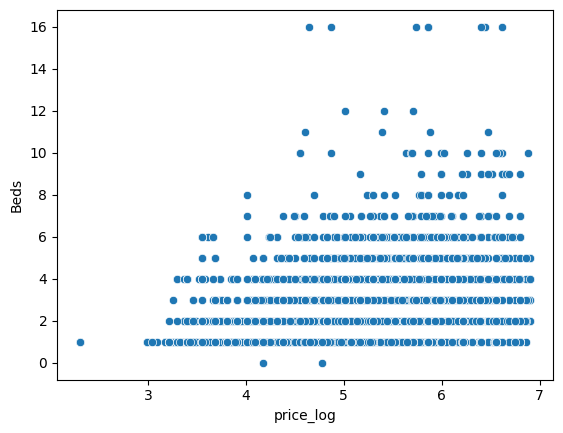

In [92]:
# Question 2.5
# Scatterplot of price_log and Beds
sns.scatterplot(data=airbnb, x='price_log', y='Beds')

This scatterplot shows that the log price increases as the number of beds increases. However, this relationship is not perfectly linear.

In [93]:
# Group by beds
airbnb.groupby(['Beds']).describe()

Host Id                                                                 \
        count          mean           std        min         25%         50%   
Beds                                                                           
0.0       2.0  1.817718e+07  2.403258e+07  1183577.0  9680377.25  18177177.5   
1.0   20344.0  1.286048e+07  1.191158e+07     1039.0  2808127.00   8639277.0   
2.0    6610.0  1.233992e+07  1.178468e+07     2339.0  2538621.00   8116011.0   
3.0    2071.0  1.242287e+07  1.208730e+07      500.0  2270425.50   8028564.0   
4.0     783.0  1.345597e+07  1.224778e+07     3867.0  2574883.00   9852976.0   
5.0     284.0  1.349512e+07  1.215818e+07     5926.0  2831681.50   9550244.0   
6.0     177.0  1.195285e+07  1.137458e+07     8730.0  2394642.00   7452455.0   
7.0      45.0  1.559385e+07  1.102396e+07    53024.0  5238263.00  14163669.0   
8.0      24.0  1.138116e+07  1.024218e+07    63349.0  3752082.00   8494395.5   
9.0      15.0  1.725782e+07  1.135412e+07  1776648.0  8233468.00  16880163.0   
10.0     16.0  1.306688e+07  1.030323e+07    22486.0  3818726.75  12852951.5   
11.0      5.0  8.811699e+06  6.507978e+06  2574826.0  2948223.00   7452455.0   
12.0      4.0  1.066529e+07  1.839073e+07    72062.0  1299927.50   2192430.0   
16.0     13.0  1.306678e+07  1.465063e+07  1360198.0  1495196.00   4291007.0   

                              Review Scores Rating (bin)             ...  \
              75%         max                      count       mean  ...   
Beds                                                                 ...   
0.0   26673977.75  35170778.0                        1.0  80.000000  ...   
1.0   21412642.75  43033067.0                    14506.0  91.175720  ...   
2.0   20405689.00  43007478.0                     4941.0  90.493827  ...   
3.0   20916314.00  42995294.0                     1594.0  88.908407  ...   
4.0   22380251.50  42897684.0                      601.0  88.327787  ...   
5.0   22342517.25  43022976.0                      227.0  89.074890  ...   
6.0   19928891.00  42886451.0                      146.0  89.828767  ...   
7.0   23234988.00  41105505.0                       38.0  88.026316  ...   
8.0   17079818.50  38436652.0                       16.0  87.812500  ...   
9.0   24468924.50  35384978.0                        9.0  88.888889  ...   
10.0  21908374.50  26900762.0                       15.0  88.666667  ...   
11.0  14179822.00  16903170.0                        3.0  85.000000  ...   
12.0  11557796.75  38204255.0                        4.0  67.500000  ...   
16.0  20270339.00  42037915.0                       10.0  93.000000  ...   

     clean_price        price_log                                          \
             75%    max     count      mean       std       min       25%   
Beds                                                                        
0.0       105.50  119.0       2.0  4.476755  0.427613  4.174387  4.325571   
1.0       155.00  950.0   20307.0  4.682084  0.527569  2.302585  4.317488   
2.0       225.00  999.0    6561.0  5.077679  0.546961  3.218876  4.744932   
3.0       299.00  999.0    2029.0  5.297638  0.572851  3.258097  4.941642   
4.0       363.75  999.0     766.0  5.438240  0.666451  3.295837  5.010635   
5.0       425.00  995.0     274.0  5.596976  0.624868  3.555348  5.225704   
6.0       399.00  900.0     166.0  5.538625  0.712393  3.555348  5.212968   
7.0       445.00  900.0      45.0  5.617009  0.693481  4.007333  5.176150   
8.0       408.75  750.0      20.0  5.674340  0.579810  4.007333  5.386655   
9.0       750.00  900.0      14.0  6.297723  0.444839  5.164786  6.044738   
10.0      650.00  975.0      15.0  5.878112  0.737968  4.553877  5.659094   
11.0      431.75  650.0       4.0  5.589773  0.791877  4.605170  5.196513   
12.0      262.50  300.0       3.0  5.376839  0.348237  5.010635  5.213368   
16.0      606.25  750.0       8.0  5.801986  0.722260  4.644391  5.516890   

                                    
     

Smaller properties have lower average prices and larger properties have higher average prices. For the log price, the mean increases from about 4.7 for one bed to about 6.2 for 9 beds. The standard deviation for the raw prices is very large but for the log prices the standard deviation is smaller and more stable across different bed counts.

<Axes: xlabel='price_log', ylabel='Beds'>

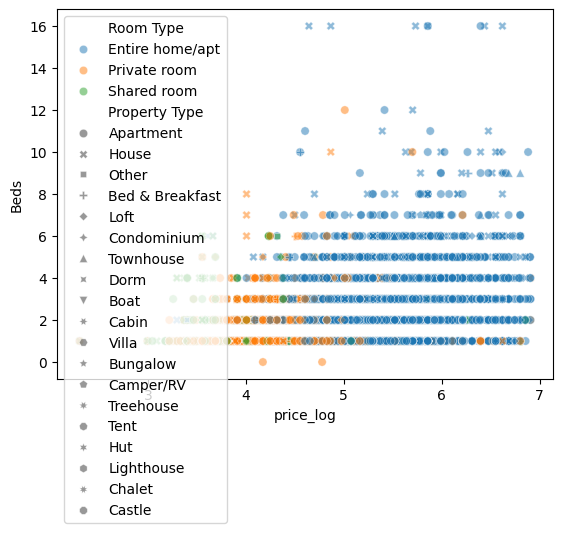

In [94]:
# Question 2.6
sns.scatterplot(data = airbnb, x = 'price_log', y = 'Beds', hue = 'Room Type', style = 'Property Type', alpha = 0.5, legend = "brief")

Question 2.6 Part A: Entire home/apt dominates almost every bed count. It is more common to see private rooms with lower bed counts from 1-3 beds. Apartments and houses are the most common in the data set with other property types scattered in smaller numbers.

In [95]:
airbnb.groupby(['Room Type', 'Property Type']).describe()

Host Id                              \
                                   count          mean           std   
Room Type       Property Type                                          
Entire home/apt Apartment        15669.0  1.178074e+07  1.150914e+07   
                Bed & Breakfast     13.0  1.290216e+07  1.307981e+07   
                Boat                 7.0  1.069583e+07  1.349472e+07   
                Bungalow             4.0  1.115067e+07  1.896992e+07   
                Cabin                1.0  2.727300e+05           NaN   
                Camper/RV            6.0  6.461864e+06  6.193663e+06   
                Condominium         72.0  1.709774e+07  1.412586e+07   
                Dorm                 4.0  2.459831e+07  1.387733e+07   
                House              752.0  1.197532e+07  1.158470e+07   
                Lighthouse           1.0  7.365834e+06           NaN   
                Loft               392.0  9.074278e+06  1.065131e+07   
                Other               14.0  1.608903e+07  1.328693e+07   
                Townhouse           83.0  1.778214e+07  1.358084e+07   
                Villa                4.0  1.966778e+07  3.220547e+06   
Private room    Apartment        10748.0  1.369656e+07  1.211993e+07   
                Bed & Breakfast    155.0  1.244387e+07  1.112797e+07   
                Boat                 1.0  2.399729e+07           NaN   
                Cabin                1.0  1.454655e+06           NaN   
                Camper/RV            1.0  3.955733e+06           NaN   
                Castle               1.0  8.954264e+06           NaN   
                Chalet               1.0  8.072802e+06           NaN   
                Condominium         22.0  2.015523e+07  1.451352e+07   
                Dorm                16.0  9.008838e+06  1.050566e+07   
                House             1258.0  1.450186e+07  1.260241e+07   
                Hut                  2.0  1.768772e+07  1.516102e+07   
                Loft               312.0  1.062362e+07  1.141788e+07   
                Other               29.0  1.614348e+07  1.063706e+07   
                Tent                 4.0  1.436074e+07  7.845372e+06   
                Townhouse           52.0  1.377223e+07  1.371804e+07   
                Treehouse            1.0  4.107600e+06           NaN   
                Villa                4.0  1.695613e+07  1.092925e+07   
Shared room     Apartment          685.0  1.704742e+07  1.290754e+07   
                Bed & Breakfast     12.0  2.482139e+07  1.066542e+07   
                Dorm                11.0  1.869742e+07  1.731889e+07   
                House               80.0  1.729939e+07  1.139408e+07   
                Loft                49.0  2.238062e+07  1.463462e+07   
                Other                4.0  8.342521e+06  7.060678e+06   
                Townhouse            1.0  2.550244e+07           NaN   
                Treehouse            3.0  6.162910e+06  1.897838e+06   

                                                                      \
                                        min          25%         50%   
Room Type       Property Type                                          
Entire home/apt Apartment             500.0   2346935.00   7458665.0   
                Bed & Breakfast     13070.0   1856604.00   7351579.0   
                Boat                65179.0    924094.50   5720054.0   
                Bungalow          1106731.0   1106731.00   1957937.0   
                Cabin              272730.0    272730.00    272730.0   
                Camper/RV         3843958.0   3955733.00   3955733.0   
                Condominium          8730.0   3931054.25  11552178.0   
                Dorm              9898029.0  14177008.50  26024638.0   
                House               10889.0   2280048.00   8395825.5   
                Lighthouse        7365834.0   7365834.00   7365834.0   
                Loft                 8057.0   1417138.25   4129231.0   


Question 2.6 Part B: The highest prices on average is for the entire home/apt: condominium with a log mean of 5.48. The highest standard deviation on average comes from entire home/apt: other with a log standard deviation of 0.86. The median appears to be a more reliable measure of central tendency because it is more robust to outliers.

In [96]:
# Question 3
drilling = pd.read_csv("drilling_rigs.csv")
drilling.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [97]:
# Question 3.1
print(drilling.shape)
print(drilling.dtypes)

(623, 10)
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                          

The dimensions of this data set are 623 observations across 10 different variables. Some variables will need to be typecast because not all of them were read in correctly by pandas. Some of the variables will need to be typecast to numeric.

In [98]:
# Question 3.2
drilling['time'] = pd.to_datetime(drilling['Month'], format='mixed')
drilling['time']

,time
0,1973-01-01
1,1973-02-01
2,1973-03-01
3,1973-04-01
4,1973-05-01
...,...
618,2024-07-01
619,2024-08-01
620,2024-09-01
621,2024-10-01


<Axes: xlabel='time', ylabel='Active Well Service Rig Count (Number of Rigs)'>

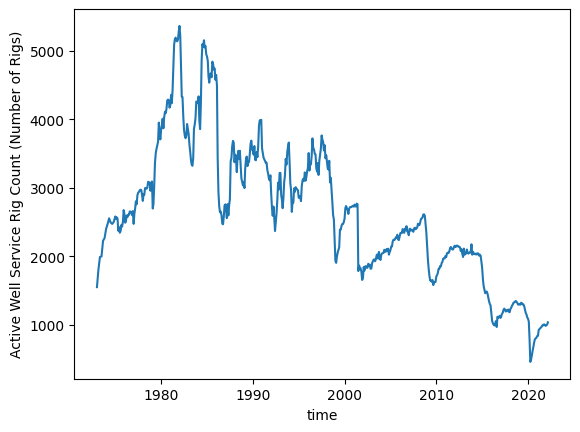

In [99]:
# Question 3.3
for column in drilling.columns:
  if column not in ['Month', 'time']:
    drilling[column] = pd.to_numeric(drilling[column], errors = "coerce")


sns.lineplot(data = drilling, x = 'time', y = 'Active Well Service Rig Count (Number of Rigs)')

The number of active rigs shows sharp rises and declines rather than a steady trend. After peaking in the 1980s, the overall rig count decreases except for a few big booms.

<Axes: xlabel='time', ylabel='rig_difference'>

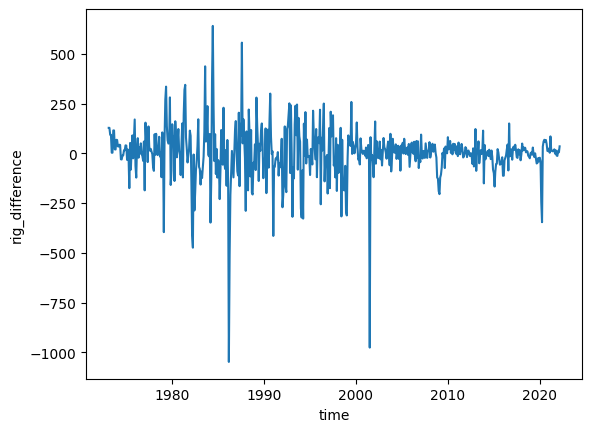

In [100]:
# Question 3.4
drilling['rig_difference'] = drilling['Active Well Service Rig Count (Number of Rigs)'].diff()
sns.lineplot(data = drilling, x = 'time', y = 'rig_difference')

Most of the time, rig count changes remain around zero but there are still some large spikes and drops in rig difference. The biggest drops occur around the mid-1980s and early 2000s, and the biggest increases occur in the late 1970s. This pattern suggests that the industry became less reactive in terms of rig count swings.

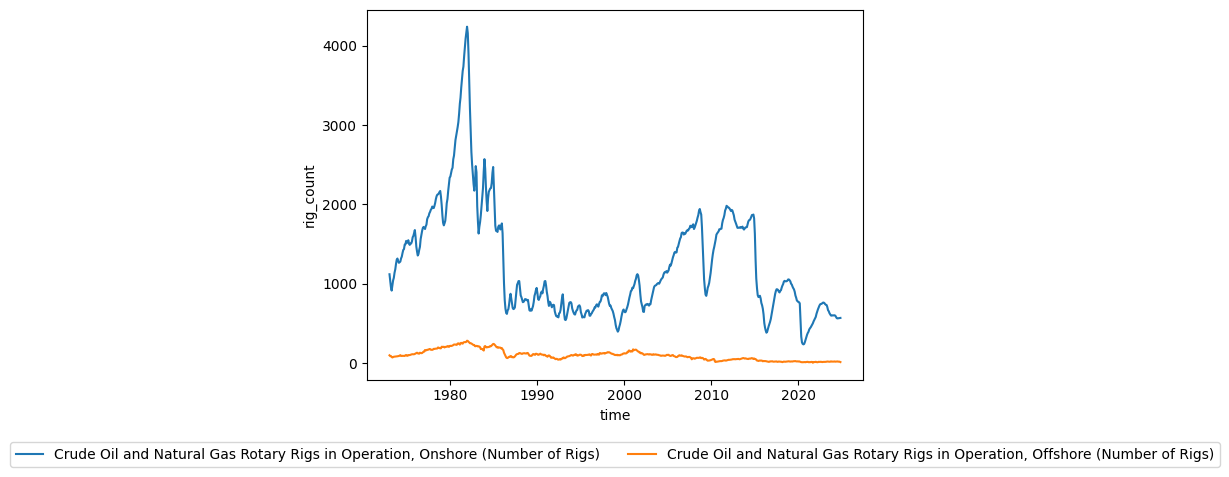

In [101]:
# Question 3.5
import matplotlib.pyplot as plt

drilling_melt = drilling.melt(
    id_vars = 'time',
    value_vars = ['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
    var_name = 'type_of_rig',
    value_name = 'rig_count'
)
sns.lineplot(data = drilling_melt, x = 'time', y = 'rig_count', hue = 'type_of_rig')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)